In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
df = pd.read_csv('D:\\DataScience\\Term 1\\8.IML\\1.Models\\1.Regression\\1.kNN\\2.MPG Dataset\\auto-mpg.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df['model year'] = '19'+df['model year'].astype('str')
 

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,1970,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1970,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,1970,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,1970,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,1970,1,ford torino


In [6]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year       object
origin            int64
car name         object
dtype: object

In [7]:
df['model year'] = df['model year'].astype(int)


In [8]:
df['elapsed_years'] = 2023-df['model year']

In [9]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,elapsed_years
0,18.0,8,307.0,130,3504,12.0,1970,1,chevrolet chevelle malibu,53
1,15.0,8,350.0,165,3693,11.5,1970,1,buick skylark 320,53
2,18.0,8,318.0,150,3436,11.0,1970,1,plymouth satellite,53
3,16.0,8,304.0,150,3433,12.0,1970,1,amc rebel sst,53
4,17.0,8,302.0,140,3449,10.5,1970,1,ford torino,53


In [10]:
df = df.drop('car name',axis = 1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            398 non-null    float64
 1   cylinders      398 non-null    int64  
 2   displacement   398 non-null    float64
 3   horsepower     398 non-null    object 
 4   weight         398 non-null    int64  
 5   acceleration   398 non-null    float64
 6   model year     398 non-null    int32  
 7   origin         398 non-null    int64  
 8   elapsed_years  398 non-null    int32  
dtypes: float64(3), int32(2), int64(3), object(1)
memory usage: 25.0+ KB


In [12]:
df['horsepower'] = pd.to_numeric(df['horsepower'],errors = 'coerce')

In [13]:
df.isna().sum()
df = df.dropna()

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


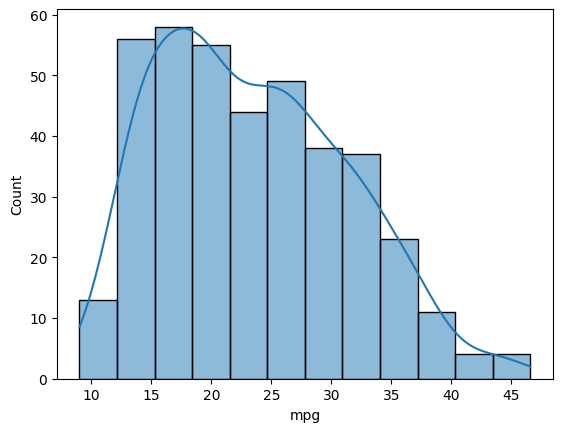

In [14]:
sns.histplot(data = df,x = 'mpg',kde = True)
plt.show()

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='cylinders', ylabel='mpg'>

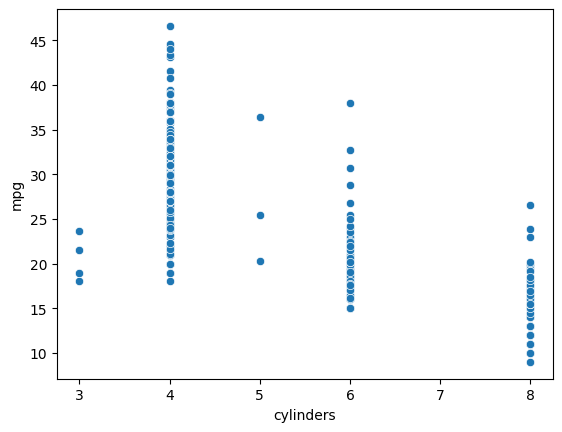

In [15]:
sns.scatterplot(data = df,x = 'cylinders',y = 'mpg')

In [16]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,elapsed_years
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,-0.290316
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,-1.000000
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,-0.181528
elapsed_years,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,-1.000000,-0.181528,1.000000


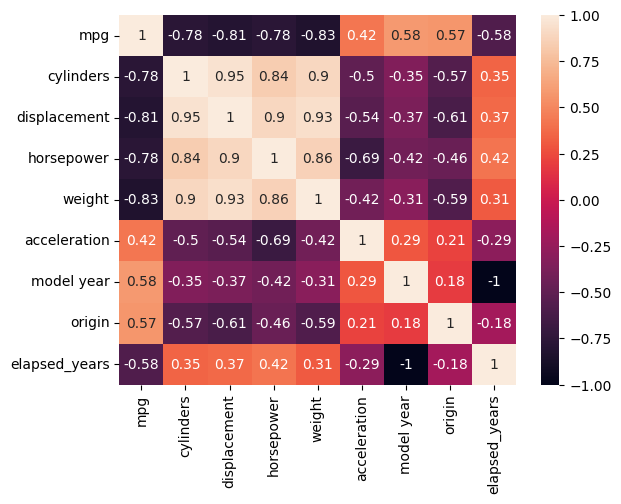

In [17]:

sns.heatmap(data = df.corr(),annot = True)
plt.show()

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='mpg', ylabel='weight'>

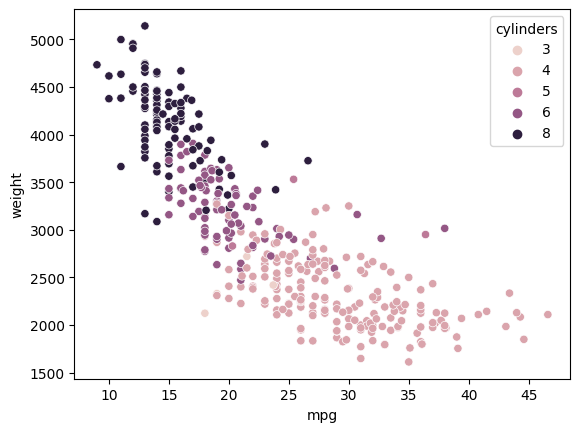

In [18]:
sns.scatterplot(data = df,x = 'mpg',y = 'weight',hue = 'cylinders')

In [19]:
df.isna().sum()

mpg              0
cylinders        0
displacement     0
horsepower       0
weight           0
acceleration     0
model year       0
origin           0
elapsed_years    0
dtype: int64

In [20]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,elapsed_years
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,1975.979592,1.576531,47.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1970.000000,1.000000,41.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,1973.000000,1.000000,44.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,1976.000000,1.000000,47.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,1979.000000,2.000000,50.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,1982.000000,3.000000,53.000000


In [21]:
#Outlier filter

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3-Q1

In [22]:
#There are outliers in the acceleration,horsepower

In [23]:
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

In [24]:
lower_bound

mpg                -1.000
cylinders          -2.000
displacement     -151.125
horsepower         -1.500
weight            141.000
acceleration        8.900
model year       1964.000
origin             -0.500
elapsed_years      35.000
dtype: float64

In [25]:
upper_bound

mpg                47.000
cylinders          14.000
displacement      531.875
horsepower        202.500
weight           5699.000
acceleration       21.900
model year       1988.000
origin              3.500
elapsed_years      59.000
dtype: float64

In [26]:
df = df[~((df<lower_bound) | (df > upper_bound)).any(axis=1)]

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='horsepower'>

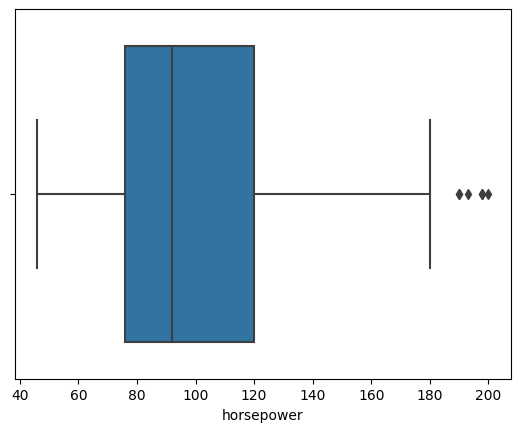

In [27]:
sns.boxplot(data = df,x = 'horsepower')

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='acceleration'>

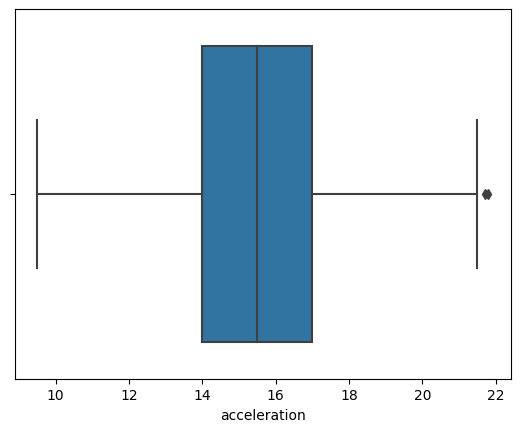

In [28]:
sns.boxplot(data = df,x = 'acceleration')

In [29]:
#Scaling the data

df = df.drop('model year',axis = 1)

In [30]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,elapsed_years
0,18.0,8,307.0,130.0,3504,12.0,1,53
1,15.0,8,350.0,165.0,3693,11.5,1,53
2,18.0,8,318.0,150.0,3436,11.0,1,53
3,16.0,8,304.0,150.0,3433,12.0,1,53
4,17.0,8,302.0,140.0,3449,10.5,1,53


In [31]:
X = df.drop('mpg',axis = 1)

In [32]:
y = df.mpg

In [33]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[1.        , 0.66204986, 0.54545455, ..., 0.20325203, 0.        ,
        1.        ],
       [1.        , 0.78116343, 0.77272727, ..., 0.16260163, 0.        ,
        1.        ],
       [1.        , 0.69252078, 0.67532468, ..., 0.12195122, 0.        ,
        1.        ],
       ...,
       [0.2       , 0.18559557, 0.24675325, ..., 0.17073171, 0.        ,
        0.        ],
       [0.2       , 0.14404432, 0.21428571, ..., 0.7398374 , 0.        ,
        0.        ],
       [0.2       , 0.14127424, 0.23376623, ..., 0.80487805, 0.        ,
        0.        ]])

In [34]:
X_scaled = pd.DataFrame(X_scaled,columns = X.columns,index = X.index)

In [35]:
X_scaled.head()

,cylinders,displacement,horsepower,weight,acceleration,origin,elapsed_years
0,1.0,0.662050,0.545455,0.536150,0.203252,0.0,1.0
1,1.0,0.781163,0.772727,0.589736,0.162602,0.0,1.0
2,1.0,0.692521,0.675325,0.516870,0.121951,0.0,1.0
3,1.0,0.653740,0.675325,0.516019,0.203252,0.0,1.0
4,1.0,0.648199,0.610390,0.520556,0.081301,0.0,1.0


In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,train_size = 0.8,test_size = 0.2)

In [37]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((297, 7), (75, 7), (297,), (75,))

In [38]:
k_values = np.arange(1,21,2)

In [39]:
train_mape_values = []
test_mape_values = []
cv_mape_values = []

In [40]:
for i in k_values:
    #Training the dataset on the X_train and y_train
    model = KNeighborsRegressor(n_neighbors = i)
    model.fit(X_train,y_train)
    
    #Predicting the y_train and cal the error
    pred_train = model.predict(X_train)
    error_train = mean_absolute_percentage_error(y_train,pred_train)
    train_mape_values.append(error_train)
    
    #Predicting the y_test values using the X_test and cal the error
    pred_test = model.predict(X_test)
    error_test = mean_absolute_percentage_error(y_test,pred_test)
    test_mape_values.append(error_test)
    
    #using CV calues
    cv_scores = cross_val_score(model,X,y,cv = 5,scoring = 'neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_values.append(cv_mape)

In [41]:
train_mape_values

[0.0,
 0.09590591375330154,
 0.10749415664106926,
 0.11683307915826732,
 0.11856053475877698,
 0.12210677711119526,
 0.12184772891747947,
 0.12346082999289729,
 0.12439390414138816,
 0.12512253122489433]

In [42]:
test_mape_values

[0.13605818115551338,
 0.12623562124289475,
 0.10598049240007484,
 0.10970858393046856,
 0.10679571107193356,
 0.1101433745104134,
 0.11214193109829168,
 0.11393138378079982,
 0.11413292474956961,
 0.11503530045625882]

In [43]:
cv_mape_values

[-0.1728764806320021,
 -0.15098834087544116,
 -0.15011260639564578,
 -0.14881332475344416,
 -0.14930951108174761,
 -0.1492814705323537,
 -0.14886192413461805,
 -0.14930087786875593,
 -0.14918295986650335,
 -0.14923604116336292]

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

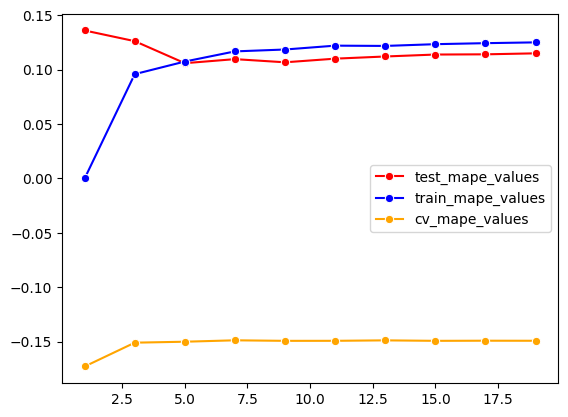

The best k_value:  1


In [44]:
sns.lineplot(x = k_values,y = test_mape_values,marker = 'o',color = 'red',label = 'test_mape_values')
sns.lineplot(x = k_values,y = train_mape_values,marker = 'o',color = 'blue',label = 'train_mape_values')
sns.lineplot(x = k_values,y = cv_mape_values,marker = 'o',color = 'orange',label = 'cv_mape_values')
plt.show()

#best_cv_value_is
best_k_cv = k_values[np.argmin(cv_mape_values)]
print("The best k_value: ",best_k_cv)